In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import imageio

import glob
sns.set(palette='colorblind')

matplotlib.rcParams['figure.figsize'] = (15, 9)

In [2]:
ims = list()
for image_path in glob.glob("..\\Data\\Time_slices_no_green\\*.png"):
    im = imageio.imread(image_path)
    ims.append(im)

In [3]:
np.shape(ims)

(20, 2160, 3840, 4)

In [4]:
ims = np.array(ims)

In [5]:
np.unique(ims[:,:,:,3])

array([255], dtype=uint8)

In [6]:
ims = ims[:,:,:,0:3]

red channel first and last


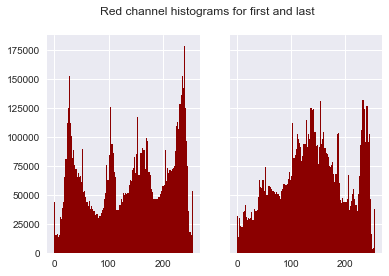

In [7]:
fig,axes = plt.subplots(nrows=1, ncols=2, sharey='row')
axes[0].hist(np.ravel(ims[0,:,:,0]),bins = 125, color = 'darkred')
axes[1].hist(np.ravel(ims[19,:,:,0]),bins = 125, color = 'darkred')
fig.suptitle('Red channel histograms for first and last ')
print('red channel first and last')

blue channel first and last


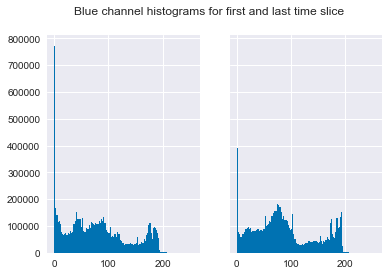

In [8]:
fig,axes = plt.subplots(nrows=1, ncols=2, sharey='row')
axes[0].hist(np.ravel(ims[0,:,:,2]),bins = 125)
axes[1].hist(np.ravel(ims[19,:,:,2]),bins = 125)
fig.suptitle('Blue channel histograms for first and last time slice')
print('blue channel first and last')

### Grey Value distribution of meat portion as greyscale over time

In [9]:
ideal_frames = np.load("../Data/npy_files/ideal_900f.npy")
ideal_masks = np.load("../Data/npy_files/ideal_masks.npy")

In [10]:
from skimage import color

In [11]:
ideal_frames_fix = np.copy(ideal_frames)
ideal_frames_fix[:,:,:,0] = ideal_frames[:,:,:,2]
ideal_frames_fix[:,:,:,2] = ideal_frames[:,:,:,0]
ideal_frames_grey = color.rgb2grey(ideal_frames_fix)


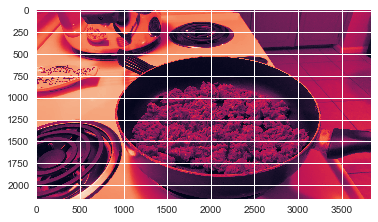

In [12]:
plt.imshow(ideal_frames_grey[0])

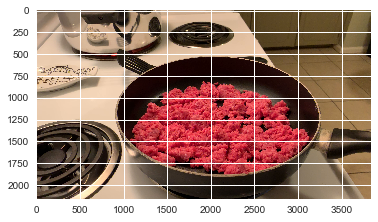

In [13]:
plt.imshow(ideal_frames_fix[0])

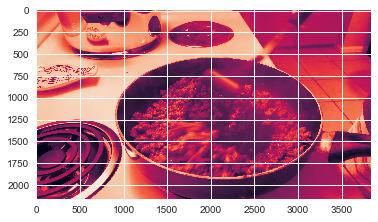

In [14]:
plt.imshow(ideal_frames_fix[19,:,:,0])

(array([1490495.,  944916., 1120653., 1206700., 1199540.,  697376.,
         385825.,  668196.,  561822.,   18877.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

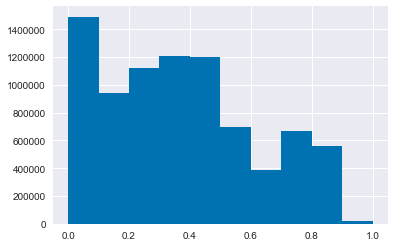

In [15]:
plt.hist(ideal_frames_grey[0].flatten())

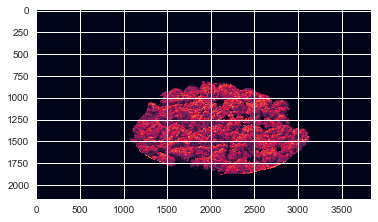

In [16]:
masked_ideal = ideal_frames_grey[0].copy()
masked_ideal[ideal_masks[0] == 0] = 0
plt.imshow(masked_ideal)

(array([1.05945e+05, 2.57640e+05, 3.23438e+05, 4.65808e+05, 3.48474e+05,
        5.78110e+04, 1.30000e+03, 1.60000e+01, 1.00000e+00, 0.00000e+00]),
 array([0.01 , 0.109, 0.208, 0.307, 0.406, 0.505, 0.604, 0.703, 0.802,
        0.901, 1.   ]),
 <a list of 10 Patch objects>)

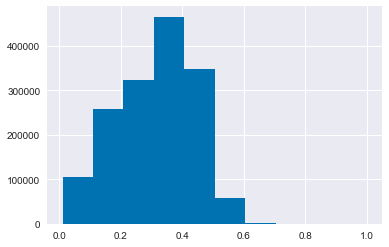

In [17]:
plt.hist(masked_ideal.flatten(),range=(.01,1))

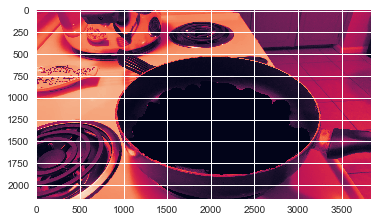

In [18]:
masked_ideal2 = ideal_frames_grey[0].copy()
masked_ideal2[ideal_masks[0] != 0] = 0
plt.imshow(masked_ideal2)

(array([1391717.,  693662.,  855448.,  698111.,  839713.,  573140.,
         387122.,  655343.,  561798.,   18589.]),
 array([0.01 , 0.109, 0.208, 0.307, 0.406, 0.505, 0.604, 0.703, 0.802,
        0.901, 1.   ]),
 <a list of 10 Patch objects>)

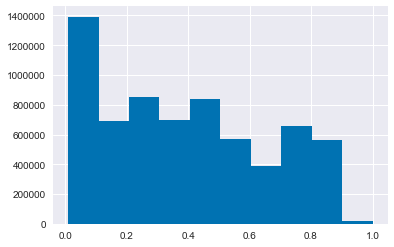

In [19]:
plt.hist(masked_ideal2.flatten(),range=(.01,1))

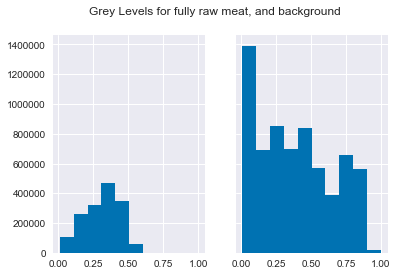

In [20]:
fig,axes = plt.subplots(nrows=1, ncols=2, sharey='row')
axes[0].hist(masked_ideal.flatten(),range=(.01,1))
axes[1].hist(masked_ideal2.flatten(),range=(.01,1))
fig.suptitle('Grey Levels for fully raw meat, and background')
print('')

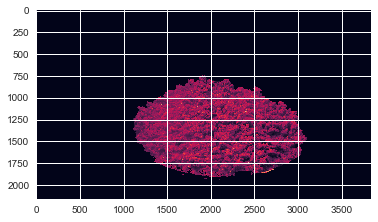

In [21]:
masked_ideal2 = ideal_frames_grey[17].copy()
masked_ideal2[ideal_masks[17] == 0] = 0
plt.imshow(masked_ideal2)

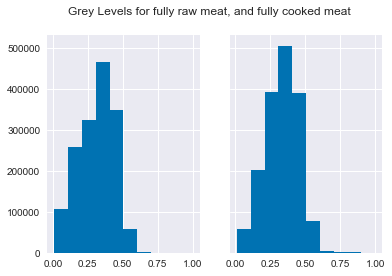

In [22]:
fig,axes = plt.subplots(nrows=1, ncols=2, sharey='row')
axes[0].hist(masked_ideal.flatten(),range=(.01,1))
axes[1].hist(masked_ideal2.flatten(),range=(.01,1))
fig.suptitle('Grey Levels for fully raw meat, and fully cooked meat')
print('')

#### Grey Level conclusions

The Grey levels alone are not enough to differentiate meat from brackground nor to differentiate cooked vs uncooked meat

### Anaysis of all three channel distributions

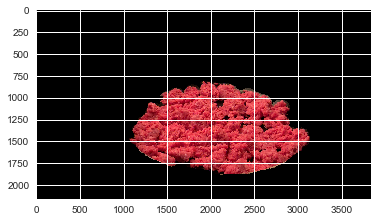

In [23]:
masked_ideal_color = ideal_frames_fix[0].copy()
masked_ideal_color[ideal_masks[0] == 0] = 0
plt.imshow(masked_ideal_color)

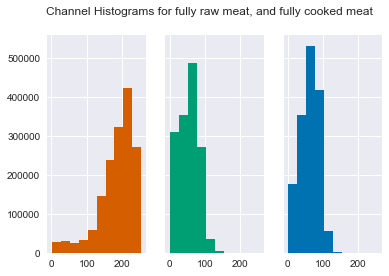

In [24]:
fig,axes = plt.subplots(nrows=1, ncols=3, sharey='row')
axes[0].hist(masked_ideal_color[:,:,0].flatten(),range=(1,255), color=sns.color_palette()[2])
axes[1].hist(masked_ideal_color[:,:,1].flatten(),range=(1,255), color=sns.color_palette()[1])
axes[2].hist(masked_ideal_color[:,:,2].flatten(),range=(1,255), color=sns.color_palette()[0])
fig.suptitle('Channel Histograms for fully raw meat, and fully cooked meat')
print('')

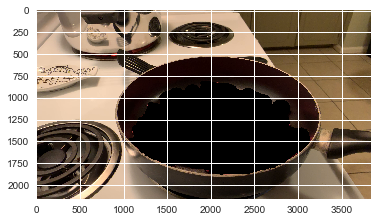

In [25]:
masked_ideal_color2 = ideal_frames_fix[0].copy()
masked_ideal_color2[ideal_masks[0] != 0] = 0
plt.imshow(masked_ideal_color2)

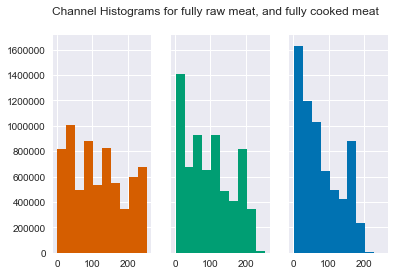

In [26]:
fig,axes = plt.subplots(nrows=1, ncols=3, sharey='row')
axes[0].hist(masked_ideal_color2[:,:,0].flatten(),range=(1,255), color=sns.color_palette()[2])
axes[1].hist(masked_ideal_color2[:,:,1].flatten(),range=(1,255), color=sns.color_palette()[1])
axes[2].hist(masked_ideal_color2[:,:,2].flatten(),range=(1,255), color=sns.color_palette()[0])
fig.suptitle('Channel Histograms for fully raw meat, and fully cooked meat')
print('')

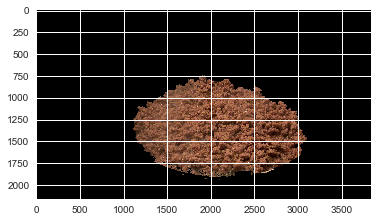

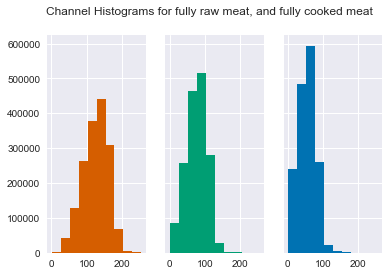

In [27]:
masked_ideal_color3 = ideal_frames_fix[17].copy()
masked_ideal_color3[ideal_masks[17] == 0] = 0
plt.imshow(masked_ideal_color3)
fig,axes = plt.subplots(nrows=1, ncols=3, sharey='row')
axes[0].hist(masked_ideal_color3[:,:,0].flatten(),range=(1,255), color=sns.color_palette()[2])
axes[1].hist(masked_ideal_color3[:,:,1].flatten(),range=(1,255), color=sns.color_palette()[1])
axes[2].hist(masked_ideal_color3[:,:,2].flatten(),range=(1,255), color=sns.color_palette()[0])
fig.suptitle('Channel Histograms for fully raw meat, and fully cooked meat')
print('')

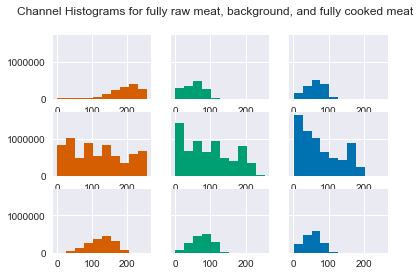

In [28]:
fig,axes = plt.subplots(nrows=3, ncols=3, sharey='all')
axes[0,0].hist(masked_ideal_color[:,:,0].flatten(),range=(1,255), color=sns.color_palette()[2])
axes[0,1].hist(masked_ideal_color[:,:,1].flatten(),range=(1,255), color=sns.color_palette()[1])
axes[0,2].hist(masked_ideal_color[:,:,2].flatten(),range=(1,255), color=sns.color_palette()[0])
axes[1,0].hist(masked_ideal_color2[:,:,0].flatten(),range=(1,255), color=sns.color_palette()[2])
axes[1,1].hist(masked_ideal_color2[:,:,1].flatten(),range=(1,255), color=sns.color_palette()[1])
axes[1,2].hist(masked_ideal_color2[:,:,2].flatten(),range=(1,255), color=sns.color_palette()[0])
axes[2,0].hist(masked_ideal_color3[:,:,0].flatten(),range=(1,255), color=sns.color_palette()[2])
axes[2,1].hist(masked_ideal_color3[:,:,1].flatten(),range=(1,255), color=sns.color_palette()[1])
axes[2,2].hist(masked_ideal_color3[:,:,2].flatten(),range=(1,255), color=sns.color_palette()[0])
fig.suptitle('Channel Histograms for fully raw meat, background, and fully cooked meat')
print('')

(array([[4., 0., 0., ..., 0., 0., 0.],
        [8., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
         67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
         78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
         89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
        100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
        111

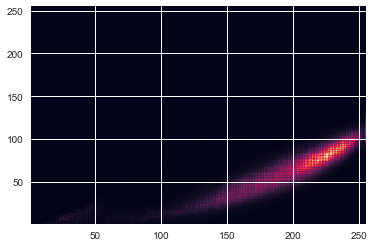

In [29]:
plt.hist2d(masked_ideal_color[:,:,0].flatten(),masked_ideal_color[:,:,2].flatten(),bins = 254,range = [[1,255],[1,255]])

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
         67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
         78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
         89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
        100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
        111

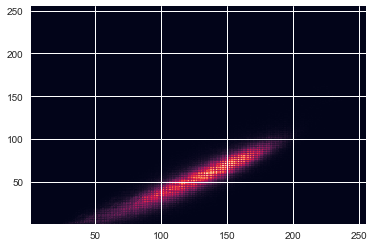

In [30]:
plt.hist2d(masked_ideal_color3[:,:,0].flatten(),masked_ideal_color3[:,:,2].flatten(),bins = 254,range = [[1,255],[1,255]])

(array([[2.741e+03, 1.100e+02, 7.900e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [5.260e+02, 3.670e+02, 6.100e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [9.600e+01, 6.020e+02, 2.550e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 3.000e+00,
         4.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.000e+00, 0.000e+00,
         1.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.300e+01,
         2.600e+01]]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
 

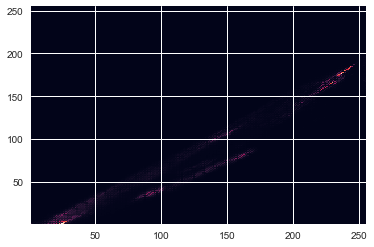

In [31]:
plt.hist2d(masked_ideal_color2[:,:,0].flatten(),masked_ideal_color2[:,:,2].flatten(),bins = 254,range = [[1,255],[1,255]])

(array([[2.745e+03, 1.100e+02, 7.900e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [5.340e+02, 3.670e+02, 6.100e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [9.600e+01, 6.020e+02, 2.550e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 3.000e+00,
         4.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.000e+00, 0.000e+00,
         1.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.300e+01,
         2.600e+01]]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
 

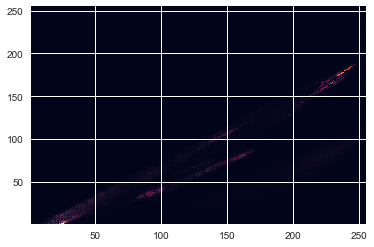

In [32]:
plt.hist2d(ideal_frames_fix[[0],:,:,0].flatten(),ideal_frames_fix[[0],:,:,2].flatten(),bins = 254,range = [[1,255],[1,255]])

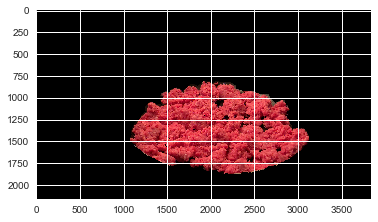

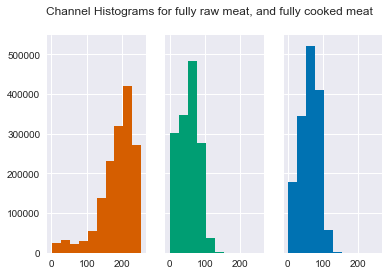

In [67]:
masked_ideal_color4 = ideal_frames_fix[1].copy()
masked_ideal_color4[ideal_masks[1] == 0] = 0
plt.imshow(masked_ideal_color4)
fig,axes = plt.subplots(nrows=1, ncols=3, sharey='row')
axes[0].hist(masked_ideal_color4[:,:,0].flatten(),range=(1,255), color=sns.color_palette()[2])
axes[1].hist(masked_ideal_color4[:,:,1].flatten(),range=(1,255), color=sns.color_palette()[1])
axes[2].hist(masked_ideal_color4[:,:,2].flatten(),range=(1,255), color=sns.color_palette()[0])
fig.suptitle('Channel Histograms for fully raw meat, and fully cooked meat')
print('')

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
         67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
         78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
         89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
        100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
        111

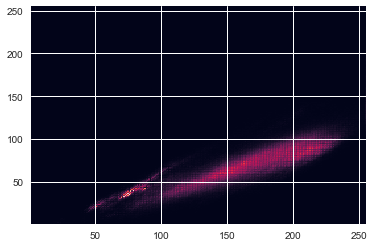

In [34]:
plt.hist2d(masked_ideal_color4[:,:,0].flatten(),masked_ideal_color4[:,:,2].flatten(),bins = 254,range = [[1,255],[1,255]])

(array([[ 42.,  20.,   5., ...,   0.,   0.,   0.],
        [121.,  82.,  30., ...,   0.,   0.,   0.],
        [ 45., 150.,  39., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   3.,   3.,   4.]]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
         67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
         78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
         89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
        100.,

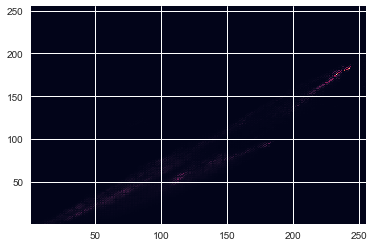

In [35]:
plt.hist2d(ideal_frames_fix[[19],:,:,0].flatten(),ideal_frames_fix[[19],:,:,2].flatten(),bins = 254,range = [[1,255],[1,255]])

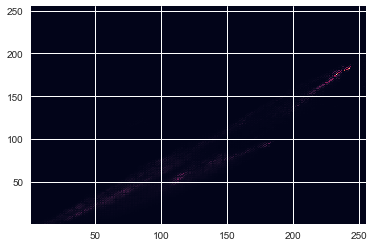

In [36]:
fig, ax = plt.subplots()
hist,x,y,i = ax.hist2d(ideal_frames_fix[[19],:,:,0].flatten(),ideal_frames_fix[[19],:,:,2].flatten(),bins = 254,range = [[1,255],[1,255]])


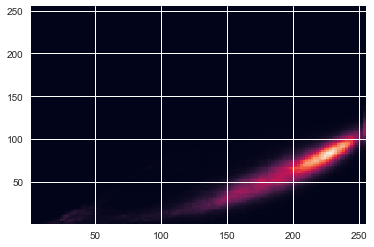

In [68]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
fig, ax = plt.subplots()
masked_ideal_color_ani = ideal_frames_fix[0].copy()
masked_ideal_color_ani[ideal_masks[0] == 0] = 0
hist,x,y,z = ax.hist2d(masked_ideal_color_ani[:,:,0].flatten(),masked_ideal_color_ani[:,:,2].flatten(),bins = 254,range = [[1,255],[1,255]])


def animate(i):
    ax.collections = []
    masked_ideal_color_ani = ideal_frames_fix[i].copy()
    masked_ideal_color_ani[ideal_masks[i] == 0] = 0
    hist,x,y,z = ax.hist2d(masked_ideal_color_ani[:,:,0].flatten(),masked_ideal_color_ani[:,:,2].flatten(),bins = 127,range = [[1,255],[1,255]])

anim = FuncAnimation(
    fig, animate, frames = range(1,20), interval=500)

HTML(anim.to_html5_video())


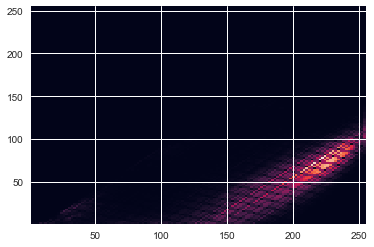

In [69]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
fig, ax = plt.subplots()
masked_ideal_color_ani = ideal_frames_fix[0].copy()
masked_ideal_color_ani[ideal_masks[0] == 0] = 0
hist,x,y,z = ax.hist2d(masked_ideal_color_ani[:,:,0].flatten(),masked_ideal_color_ani[:,:,1].flatten(),bins = 254,range = [[1,255],[1,255]])


def animate(i):
    ax.collections = []
    masked_ideal_color_ani = ideal_frames_fix[i].copy()
    masked_ideal_color_ani[ideal_masks[i] == 0] = 0
    hist,x,y,z = ax.hist2d(masked_ideal_color_ani[:,:,0].flatten(),masked_ideal_color_ani[:,:,1].flatten(),bins = 127,range = [[1,255],[1,255]])

anim = FuncAnimation(
    fig, animate, frames = range(1,20), interval=500)

HTML(anim.to_html5_video())


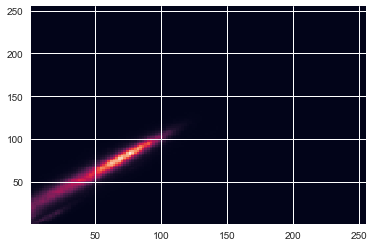

In [70]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
fig, ax = plt.subplots()
masked_ideal_color_ani = ideal_frames_fix[0].copy()
masked_ideal_color_ani[ideal_masks[0] == 0] = 0
hist,x,y,z = ax.hist2d(masked_ideal_color_ani[:,:,1].flatten(),masked_ideal_color_ani[:,:,2].flatten(),bins = 254,range = [[1,255],[1,255]])


def animate(i):
    ax.collections = []
    masked_ideal_color_ani = ideal_frames_fix[i].copy()
    masked_ideal_color_ani[ideal_masks[i] == 0] = 0
    hist,x,y,z = ax.hist2d(masked_ideal_color_ani[:,:,1].flatten(),masked_ideal_color_ani[:,:,2].flatten(),bins = 127,range = [[1,255],[1,255]])

anim = FuncAnimation(
    fig, animate, frames = range(1,20), interval=500)

HTML(anim.to_html5_video())


In [65]:
anim.save('im2.mp4', writer=writer)

In [62]:
for i in range(1,20):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
